In [4]:
import pandas as pd
import numpy as np

## Load in Data

In [112]:
data_filepath='resume_assessment_long_format_gpt4o_temp3e-1_interview.csv'
data_filepath='resume_assessment_long_format_gpt4o_temp1_interview.csv'

# data_filepath='resume_assessment_long_format_gpt4o_name_v2_jobs_v1.csv'
# data_filepath='resume_assessment_long_format_gpt4o_name_v2_jobs_v2.csv'
data_filepath='resume_assessment_long_format_gpt4o_name_v1_jobs_v2.csv'

In [113]:
df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0)
].copy()

df = df.groupby(
    ["role", "prompt", "variable", "race", "gender", "raceBLS", "genderBLS", "name"],
    group_keys=False
).apply(lambda x: x.sample(n=10, random_state=42))

# filter for race is equal to 'white' or 'black' or 
df = df[df['race'].isin(['white', 'black', 'asian', 'hispanic'])]


C:\Users\t-nmeister\AppData\Local\Temp\ipykernel_30100\2461364909.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: x.sample(n=10, random_state=42))


In [107]:
roles_of_interest = [
    "financial analyst",
    "human resources specialist",
    "social worker",
    "software developer"
]
df = df[df['role'].isin(roles_of_interest)]


In [114]:
roles_of_interest = [
    "financial_analyst",
'HR_manager',
    "social_worker",
    "software_engineer"
]
df = df[df['role'].isin(roles_of_interest)]

In [115]:

# Define levels
gender_levels = ["men", "women"]
race_levels = ["white", "hispanic", "asian", "black"]

# Aggregate sum of 'value' by race and gender
agg = df.groupby(['race', 'gender'])['value'].sum().reset_index()

# Calculate overall sum of 'value'
total_value = agg['value'].sum()

# Calculate probability of being hired per group
agg['prob'] = agg['value'] / total_value

# Create a function to get probability for a group
def get_prob(race, gender):
    row = agg[(agg['race'] == race) & (agg['gender'] == gender)]
    if not row.empty:
        return row['prob'].values[0]
    else:
        return 0

# Reference groups
ref_gender = 'men'
ref_race = 'white'

# Probability for reference groups
prob_ref_gender = agg[agg['gender'] == ref_gender]['prob'].sum()
prob_ref_race = agg[agg['race'] == ref_race]['prob'].sum()
prob_ref_combined = get_prob(ref_race, ref_gender)

# Compute relative probabilities

# 1. Female vs Male (all races)
prob_women = agg[agg['gender'] == 'women']['prob'].sum()
prob_men = agg[agg['gender'] == 'men']['prob'].sum()
rel_prob_female_vs_male = prob_women / prob_men if prob_men else None

# 2. Hispanic vs White (all genders)
prob_hispanic = agg[agg['race'] == 'hispanic']['prob'].sum()
prob_white = agg[agg['race'] == 'white']['prob'].sum()
rel_prob_hispanic_vs_white = prob_hispanic / prob_white if prob_white else None

# 3. Asian vs White (all genders)
prob_asian = agg[agg['race'] == 'asian']['prob'].sum()
rel_prob_asian_vs_white = prob_asian / prob_white if prob_white else None

# 4. Black vs White (all genders)
prob_black = agg[agg['race'] == 'black']['prob'].sum()
rel_prob_black_vs_white = prob_black / prob_white if prob_white else None

# 5. Black women vs White men
prob_black_women = get_prob('black', 'women')
prob_white_men = get_prob('white', 'men')
rel_prob_black_women_vs_white_men = prob_black_women / prob_white_men if prob_white_men else None

# Print reference probabilities (rounded to 2 decimal places)
print("Probability female:", round(prob_women, 4))
print("Probability male:", round(prob_men, 4))
print("Probability white:", round(prob_white, 4))
print("Probability hispanic:", round(prob_hispanic, 4))
print("Probability asian:", round(prob_asian, 4))
print("Probability black:", round(prob_black, 4))

# Print results (rounded to 4 decimal places)
print("Relative probability female vs male:", round(rel_prob_female_vs_male, 4))
print("Relative probability hispanic vs white:", round(rel_prob_hispanic_vs_white, 4))
print("Relative probability asian vs white:", round(rel_prob_asian_vs_white, 4))
print("Relative probability black vs white:", round(rel_prob_black_vs_white, 4))
print("Relative probability black women vs white men:", round(rel_prob_black_women_vs_white_men, 4))


Probability female: 0.5005
Probability male: 0.4995
Probability white: 0.25
Probability hispanic: 0.25
Probability asian: 0.2502
Probability black: 0.2498
Relative probability female vs male: 1.0019
Relative probability hispanic vs white: 1.0001
Relative probability asian vs white: 1.0009
Relative probability black vs white: 0.9994
Relative probability black women vs white men: 1.0031


C:\Users\t-nmeister\AppData\Local\Temp\ipykernel_30100\26246926.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: x.sample(n=10, random_state=42))


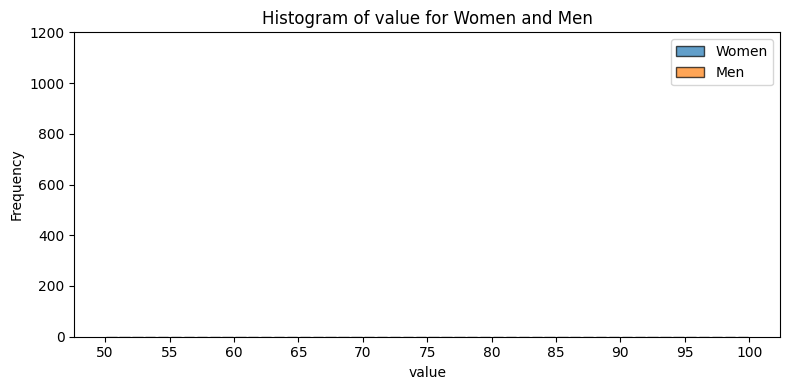

In [116]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0)].copy()

roles_of_interest = [
    "financial analyst",
    "human resources specialist",
    "social worker",
    "software developer"
]
df = df[df['role'].isin(roles_of_interest)]


df = df.groupby(
    ["role", "prompt", "variable", "race", "gender", "raceBLS", "genderBLS", "name"],
    group_keys=False
).apply(lambda x: x.sample(n=10, random_state=42))


# Only use values between 0 and 100
df_filtered = df[(df['value'] >= 0) & (df['value'] <= 100)]


# Use df_filtered which is already filtered for baseline and value in [0, 100]
plt.figure(figsize=(8, 4))
plt.hist(
    [df_filtered[df_filtered['gender'] == 'women']['value'], df_filtered[df_filtered['gender'] == 'men']['value']],
    bins=range(50, 101),
    label=['Women', 'Men'],
    alpha=0.7,
    edgecolor='black'
)
plt.title('Histogram of value for Women and Men')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.ylim(0, 1200)
plt.xticks(range(50, 101, 5))
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\t-nmeister\AppData\Local\Temp\ipykernel_30100\661387867.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: x.sample(n=10, random_state=42))


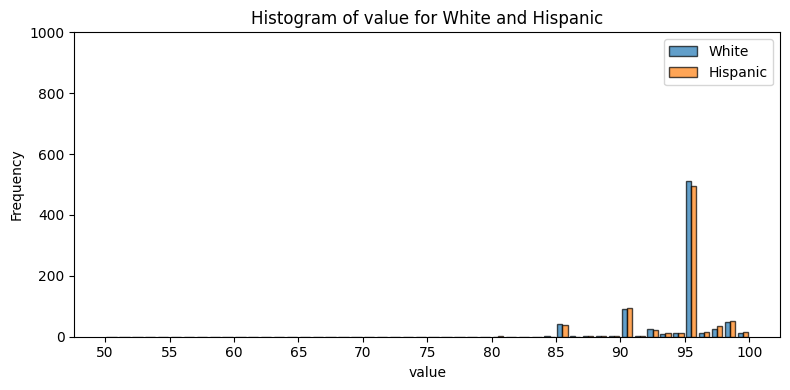

In [117]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

df = pd.read_csv(data_filepath)


df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0)
].copy()



df = df.groupby(
    ["role", "prompt", "variable", "race", "gender", "raceBLS", "genderBLS", "name"],
    group_keys=False
).apply(lambda x: x.sample(n=10, random_state=42))
# Only use values between 0 and 100
df_filtered = df[(df['value'] >= 0) & (df['value'] <= 100)]


# Use df_filtered which is already filtered for baseline and value in [0, 100]
plt.figure(figsize=(8, 4))
plt.hist(
    [df_filtered[df_filtered['race'] == 'white']['value'], df_filtered[df_filtered['race'] == 'hispanic']['value']],    
    bins=range(50, 101),
    label=['White', 'Hispanic'],
    alpha=0.7,
    edgecolor='black'
)
plt.title('Histogram of value for White and Hispanic')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.ylim(0, 1000)
plt.xticks(range(50, 101, 5))
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\t-nmeister\AppData\Local\Temp\ipykernel_30100\2928395311.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: x.sample(n=10, random_state=42))


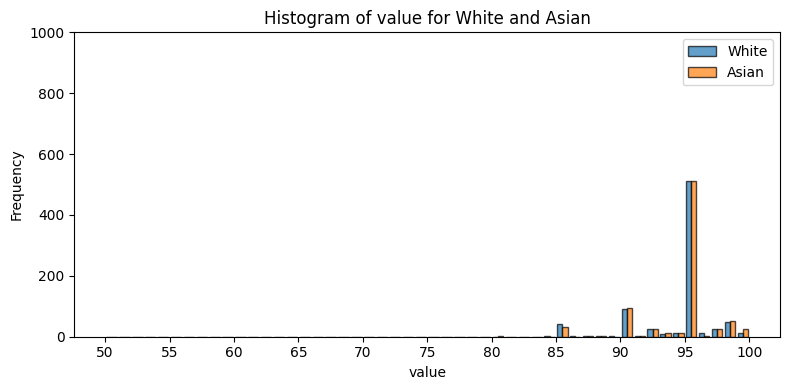

In [118]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

df = pd.read_csv(data_filepath)


df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0)
].copy()
df = df.groupby(
    ["role", "prompt", "variable", "race", "gender", "raceBLS", "genderBLS", "name"],
    group_keys=False
).apply(lambda x: x.sample(n=10, random_state=42))

# Only use values between 0 and 100
df_filtered = df[(df['value'] >= 0) & (df['value'] <= 100)]


# Use df_filtered which is already filtered for baseline and value in [0, 100]
plt.figure(figsize=(8, 4))
plt.hist(
    [df_filtered[df_filtered['race'] == 'white']['value'], df_filtered[df_filtered['race'] == 'asian']['value']],    
    bins=range(50, 101),
    label=['White', 'Asian'],
    alpha=0.7,
    edgecolor='black'
)
plt.title('Histogram of value for White and Asian')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.ylim(0, 1000)
plt.xticks(range(50, 101, 5))
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\t-nmeister\AppData\Local\Temp\ipykernel_30100\771956627.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: x.sample(n=10, random_state=42))


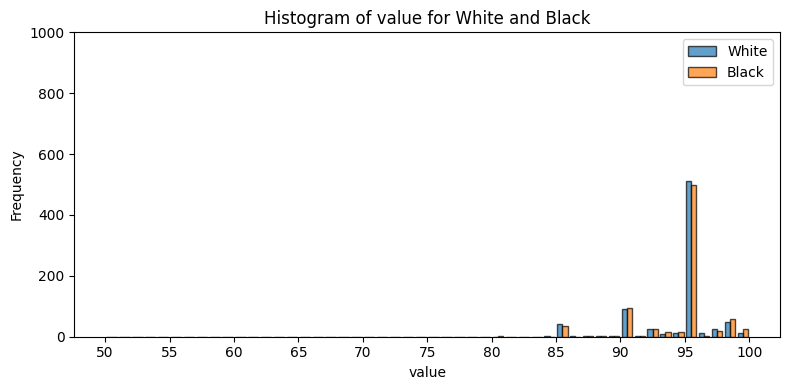

In [119]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0) 
].copy()

df = df.groupby(
    ["role", "prompt", "variable", "race", "gender", "raceBLS", "genderBLS", "name"],
    group_keys=False
).apply(lambda x: x.sample(n=10, random_state=42))


# Only use values between 0 and 100
df_filtered = df[(df['value'] >= 0) & (df['value'] <= 100)]


# Use df_filtered which is already filtered for baseline and value in [0, 100]
plt.figure(figsize=(8, 4))
plt.hist(
    [df_filtered[df_filtered['race'] == 'white']['value'], df_filtered[df_filtered['race'] == 'black']['value']],    
    bins=range(50, 101),
    label=['White', 'Black'],
    alpha=0.7,
    edgecolor='black'
)
plt.title('Histogram of value for White and Black')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.ylim(0, 1000)
plt.xticks(range(50, 101, 5))
plt.legend()
plt.tight_layout()
plt.show()


In [120]:
len(df)

3400

In [121]:
# Initialize lists to store impact ratios for each threshold
woman_ir_list = []
hispanic_ir_list = []
asian_ir_list = []
black_ir_list = []

for thresholdvalue in np.arange(0.0, 1.0, 0.001):
    threshold = df['value'].quantile(1-thresholdvalue)
    df['selected'] = (df['value'] >= threshold).astype(int)

    gender_rates = df.groupby('gender')['selected'].mean()
    race_rates = df.groupby('race')['selected'].mean()

    # Store impact ratios for each group
    if 'women' in gender_rates and 'men' in gender_rates and gender_rates['men'] != 0:
        woman_ir_list.append(float(gender_rates['women']) / float(gender_rates['men']))
    else:
        woman_ir_list.append(0)

    if 'hispanic' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
        hispanic_ir_list.append(float(race_rates['hispanic']) / float(race_rates['white']))
    else:
        hispanic_ir_list.append(0)

    if 'asian' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
        asian_ir_list.append(float(race_rates['asian']) / float(race_rates['white']))
    else:
        asian_ir_list.append(0)

    if 'black' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
        black_ir_list.append(float(race_rates['black']) / float(race_rates['white']))
    else:
        black_ir_list.append(0)


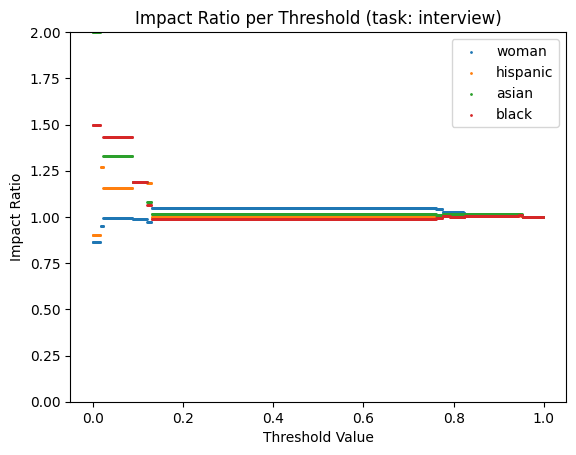

In [122]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(0.0, 1.0, 0.001), woman_ir_list, label='woman', s=1)
plt.scatter(np.arange(0.0, 1.0, 0.001), hispanic_ir_list, label='hispanic', s=1)
plt.scatter(np.arange(0.0, 1.0, 0.001), asian_ir_list, label='asian', s=1)
plt.scatter(np.arange(0.0, 1.0, 0.001), black_ir_list, label='black', s=1)
plt.xlabel('Threshold Value')
plt.ylim(0, 2)
plt.ylabel('Impact Ratio')
plt.legend()
plt.title('Impact Ratio per Threshold (task: {})'.format(prompt_type))
# save the plot
plt.savefig('figs/impact_ratio_per_threshold_{}.png'.format(prompt_type))

In [123]:
# Initialize lists to store impact ratios for each threshold
woman_or_list = []
hispanic_or_list = []
asian_or_list = []
black_or_list = []



def or_func(p_a):
    return p_a / (1 - p_a)

for thresholdvalue in np.arange(0.0, 1.0, 0.001):
    threshold = df['value'].quantile(1-thresholdvalue)
    df['selected'] = (df['value'] >= threshold).astype(int)

    gender_rates = df.groupby('gender')['selected'].mean()
    race_rates = df.groupby('race')['selected'].mean()

    # Store impact ratios for each group
    if 'women' in gender_rates and 'men' in gender_rates and gender_rates['men'] != 0:
        try: 
            woman_or_list.append(or_func(float(gender_rates['women'])) / or_func(float(gender_rates['men'])))
        except ZeroDivisionError:
            woman_or_list.append(0)
    else:
        woman_or_list.append(0)

    if 'hispanic' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
        try: 
            hispanic_or_list.append(or_func(float(race_rates['hispanic']) / float(race_rates['white'])))
        except ZeroDivisionError:
            hispanic_or_list.append(0)
    else:
        hispanic_or_list.append(0)

    if 'asian' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
        try: 
            asian_or_list.append(or_func(float(race_rates['asian']) / or_func(float(race_rates['white']))))
        except ZeroDivisionError:
            asian_or_list.append(0)
    else:
        asian_or_list.append(0)

    if 'black' in race_rates and 'white' in race_rates and race_rates['white'] != 0:
        try: 
            black_or_list.append(or_func(float(race_rates['black']) / or_func(float(race_rates['white']))))
        except ZeroDivisionError:
            black_or_list.append(0)
    else:
        black_or_list.append(0)

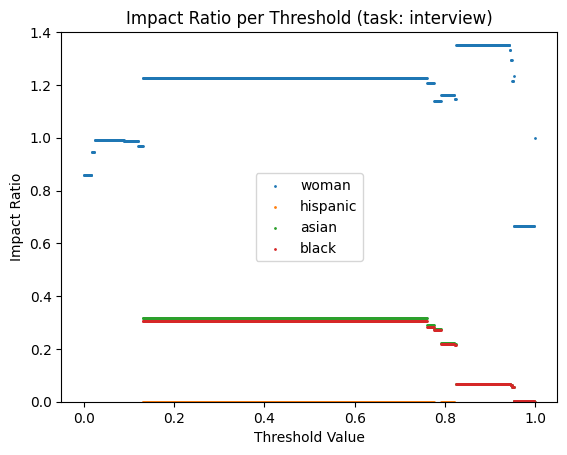

In [124]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(0.0, 1.0, 0.001), woman_or_list, label='woman', s=1)
plt.scatter(np.arange(0.0, 1.0, 0.001), hispanic_or_list, label='hispanic', s=1)
plt.scatter(np.arange(0.0, 1.0, 0.001), asian_or_list, label='asian', s=1)
plt.scatter(np.arange(0.0, 1.0, 0.001), black_or_list, label='black', s=1)
plt.xlabel('Threshold Value')
plt.ylabel('Impact Ratio')
plt.legend()
plt.ylim(0, 1.4)
plt.title('Impact Ratio per Threshold (task: {})'.format(prompt_type))
# save the plot
plt.savefig('figs/impact_ratio_per_threshold_{}.png'.format(prompt_type))

In [125]:
from scipy.stats import wasserstein_distance
df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0)
].copy()

df = df.groupby(
    ["role", "prompt", "variable", "race", "gender", "raceBLS", "genderBLS", "name"],
    group_keys=False
).apply(lambda x: x.sample(n=10, random_state=42))


df_filtered = df


# Compute Wasserstein distance between men and women
values_men = df_filtered[df_filtered['gender'] == 'men']['value']
values_women = df_filtered[df_filtered['gender'] == 'women']['value']
wd_gender = wasserstein_distance(values_men, values_women)

# Compute Wasserstein distance between white and asian
values_white = df_filtered[df_filtered['race'] == 'white']['value']
values_asian = df_filtered[df_filtered['race'] == 'asian']['value']
wd_white_asian = wasserstein_distance(values_white, values_asian)

# Compute Wasserstein distance between white and black
values_black = df_filtered[df_filtered['race'] == 'black']['value']
wd_white_black = wasserstein_distance(values_white, values_black)

# Compute Wasserstein distance between white and hispanic
values_hispanic = df_filtered[df_filtered['race'] == 'hispanic']['value']
wd_white_hispanic = wasserstein_distance(values_white, values_hispanic)

print("men vs women:", round(wd_gender, 4))
print("white vs asian:", round(wd_white_asian, 4))
print("white vs black:", round(wd_white_black, 4))
print("white vs hispanic:", round(wd_white_hispanic, 4))

men vs women: 0.2025
white vs asian: 0.2162
white vs black: 0.1513
white vs hispanic: 0.1025


C:\Users\t-nmeister\AppData\Local\Temp\ipykernel_30100\4273526610.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: x.sample(n=10, random_state=42))


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

data_filepath = 'resume_assessment_long_format_gpt4o_name_v1_jobs_v2.csv'


df = pd.read_csv(data_filepath)

prompt_type='interview'

df = df[
    (df["prompt"] == prompt_type) &
    (df["value"].notnull()) &
    (df["value"] > 0) 
].copy()

roles_of_interest = [
    "financial analyst",
    "human resources specialist",
    "social worker",
    "software developer"
]
df = df[df['role'].isin(roles_of_interest)]


df = df[df['race'].isin(['white', 'black', 'asian', 'hispanic'])]


# Drop index column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


# Convert 'value' to numeric, coercing bad strings like "NULL" to NaN
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# Define levels (to match R's factor levels)
gender_levels = ["men", "women"]
race_levels = ["white", 'hispanic', 'asian', "black", ]

def prepare_subset(df, prompt_type):

    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    
    subset = df[
        (df["prompt"] == prompt_type) &
        (df["value"].notnull()) &
        (df["value"] > 0)
    ].copy()

    subset = subset.dropna(subset=["raceBLS", "genderBLS", "gender", "race", "role", "name", "value"])


    # Factor-like columns (preserve level order like in R)
    subset["gender"] = pd.Categorical(subset["gender"], categories=gender_levels, ordered=True)
    subset["race"] = pd.Categorical(subset["race"], categories=race_levels, ordered=True)

    subset = subset.reset_index(drop=True)
    return subset



def fit_lme(df_subset, label):
    formula = "value ~ gender * race + raceBLS + genderBLS + role"
    formula = "value ~ gender * race  + role"

    df_subset = df_subset.reset_index(drop=True)
    
    model = mixedlm(formula, data=df_subset, groups=df_subset["name"])

    # model = mixedlm(formula, data=df_subset, groups=df_subset["name"])
    result = model.fit(reml=True, method="nm", maxiter=5000)
    print(f"\n--- {label} Model Summary ---")
    print(f"\n--- {label} Model Summary ---")
    print(result.summary())

# df_baseline = prepare_subset(df, "baseline")
# fit_lme(df_baseline, "Baseline")


# Interview
df_interview = prepare_subset(df, "interview")
fit_lme(df_interview, "Interview")

# # Hiring
# df_hiring = prepare_subset(df, "hiring")
# fit_lme(df_hiring, "Hiring")


ValueError: negative dimensions are not allowed

In [127]:
df_interview.head()

,role,prompt,variable,value,race,gender,raceBLS,genderBLS,name
0,accountant,interview,black women,95,black,women,0,0,Keisha Towns
1,accountant,interview,black women,95,black,women,0,0,Keisha Towns
2,accountant,interview,black women,90,black,women,0,0,Keisha Towns
3,accountant,interview,black women,95,black,women,0,0,Keisha Towns
4,accountant,interview,black women,95,black,women,0,0,Keisha Towns
